# Multi-lable classificatin


In [1]:
%matplotlib inline
import math
import os
import data_util
#from data_util import DataPoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer # convert y to {0,1}^L
from sklearn.preprocessing import StandardScaler # normalize features 
from sklearn.feature_extraction import DictVectorizer # extract feature vector to x
from numpy.random import normal # generate transforming matrix
from sklearn.neighbors import KDTree #KDTree for fast kNN search
from sklearn.externals import joblib # store classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold

In [2]:
!ls -R ../data

../data:
AmazonCat  Bibtex  Delicious  Eurlex  Mediamill  RCV1-x  Wiki10

../data/AmazonCat:
amazonCat_test.txt  amazonCat_train.txt

../data/Bibtex:
Bibtex_data.txt  bibtex_trSplit.txt  bibtex_tstSplit.txt

../data/Delicious:
Delicious_data.txt  delicious_trSplit.txt  delicious_tstSplit.txt

../data/Eurlex:
eurlex_test.txt  eurlex_train.txt

../data/Mediamill:
Mediamill_data.txt  mediamill_trSplit.txt  mediamill_tstSplit.txt

../data/RCV1-x:
rcv1x_test.txt	rcv1x_train.txt

../data/Wiki10:
wiki10_test.txt  wiki10_train.txt


In [8]:
!wc ../data/Delicious/Delicious_data.txt

  16106  310708 4981827 ../data/Delicious/Delicious_data.txt


In [9]:
data_dir = "../data"
model_dir = "../.model2"
train_filename = "/Delicious/Delicious_data.txt"
#test_filename = "/Eurlex/eurlex_test.txt"
tr_split_file = "/Delicious/delicious_trSplit.txt"
te_split_file = "/Delicious/delicious_tstSplit.txt"

path = os.path.dirname(train_filename)
model_path = model_dir + path

In [10]:
tr_data, num_point, num_feature, num_label = data_util.read_file(data_dir+train_filename)
print("num_point={}, num_label={}, num_feature={}".format(num_point, num_label, num_feature))

num_point=16105, num_label=983, num_feature=500


In [11]:
#te_data, _, _, _ = data_util.read_file(data_dir+test_filename)

In [12]:
!head ../data/Delicious/delicious_trSplit.txt

7773 5951 4889 5150 12202 10140 2046 5959 13337 2756
5845 13532 13637 7577 11233 8310 6494 11935 14224 1548
10744 9670 5157 1427 3736 14330 14013 14070 15402 2150
8579 4478 3410 10697 2132 8381 14369 2515 12969 3880
13171 7090 15992 9758 14665 10942 11859 6949 10183 1836
15296 4887 10488 2482 3473 219 7251 13543 15115 811
9713 15912 11905 15229 9161 2965 6310 8503 856 15917
2056 7946 7014 1389 2824 3509 8519 7887 12726 14968
8699 10328 720 12436 15440 7882 6011 13842 11898 6141
2067 1068 11429 4911 7824 5443 10183 463 2829 8778


## Partition Small data set

In [13]:
tr_split = data_util.split_data(data=tr_data, split_file=data_dir+tr_split_file)
te_split = data_util.split_data(data=tr_data, split_file=data_dir+te_split_file)

In [14]:
X_tr, Y_tr, X_te, Y_te = data_util.data_transform(tr_split, te_split, num_label)

In [15]:
X_tr.shape

(12920, 500)

## Explore Data Analysis

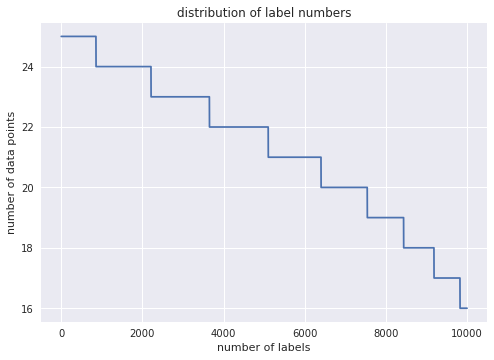

In [20]:
# number of labels for each data point
plt.plot(sorted([Y.sum() for Y in Y_tr], reverse=True)[:10000])
plt.xlabel('number of labels')
plt.ylabel('number of data points')
plt.title('distribution of label numbers')

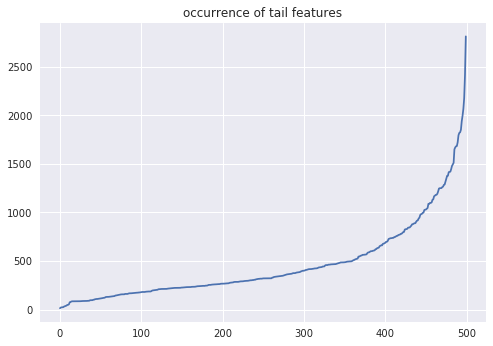

In [17]:
# usage of tail feature
plt.plot(sorted([np.count_nonzero(X_tr[:,i]) for i in range(X_tr.shape[1])], reverse=False)[:3000])
plt.title('occurrence of tail features')